In [5]:
from datasets import load_dataset

corpus = load_dataset("castorini/mr-tydi-corpus", "indonesian", trust_remote_code=True)

In [1]:
from datasets import load_dataset
mr_tydi = load_dataset("castorini/mr-tydi", "indonesian")
mr_tydi

DatasetDict({
    train: Dataset({
        features: ['query_id', 'query', 'positive_passages', 'negative_passages'],
        num_rows: 4902
    })
    dev: Dataset({
        features: ['query_id', 'query', 'positive_passages', 'negative_passages'],
        num_rows: 1224
    })
    test: Dataset({
        features: ['query_id', 'query', 'positive_passages', 'negative_passages'],
        num_rows: 829
    })
})

In [3]:
tydiqa_gold = load_dataset("khalidalt/tydiqa-goldp", 'indonesian', trust_remote_code=True)
tydiqa_gold

DatasetDict({
    train: Dataset({
        features: ['id', 'language', 'document_title', 'passage_text', 'question_text', 'answers'],
        num_rows: 5702
    })
    validation: Dataset({
        features: ['id', 'language', 'document_title', 'passage_text', 'question_text', 'answers'],
        num_rows: 565
    })
})

# EDA

In [13]:
# Mengecek untuk split 'dev' dan 'test'
for split in ['dev', 'test']:
    # Cek apakah semua positive_passages hanya berisi satu elemen
    all_positive_single = all(len(row['positive_passages']) == 1 for row in mr_tydi[split])
    
    # Cek apakah semua negative_passages kosong
    all_negative_empty = all(len(row['negative_passages']) == 0 for row in mr_tydi[split])

    print(f"Split: {split}")
    print(f"- Semua positive_passages berisi satu elemen: {all_positive_single}")
    print(f"- Semua negative_passages kosong: {all_negative_empty}")
    print("-" * 50)

Split: dev
- Semua positive_passages berisi satu elemen: True
- Semua negative_passages kosong: True
--------------------------------------------------
Split: test
- Semua positive_passages berisi satu elemen: False
- Semua negative_passages kosong: True
--------------------------------------------------


In [5]:
from collections import Counter

# Hitung jumlah elemen dalam positive_passages untuk setiap row di split 'test'
positive_lengths = [len(row['positive_passages']) for row in mr_tydi['test']]

# Hitung distribusi jumlah elemen dalam positive_passages
length_counts = Counter(positive_lengths)

# Tampilkan hasil
print("Distribusi jumlah elemen dalam positive_passages pada split 'test':")
for length, count in sorted(length_counts.items()):
    print(f"- {count} row memiliki {length} elemen")

Distribusi jumlah elemen dalam positive_passages pada split 'test':
- 706 row memiliki 1 elemen
- 114 row memiliki 2 elemen
- 9 row memiliki 3 elemen


In [4]:
from collections import defaultdict

# Buat dictionary untuk menyimpan contoh berdasarkan jumlah elemen positive_passages
examples_by_length = defaultdict(list)

# Loop melalui dataset test untuk mengumpulkan contoh
for row in mr_tydi['test']:
    length = len(row['positive_passages'])
    if len(examples_by_length[length]) < 5:  # Simpan maksimal 5 contoh per kategori
        examples_by_length[length].append(row)

# Tampilkan contoh
for length, examples in sorted(examples_by_length.items()):
    if length == 1:
        continue
    print(f"\n===== Contoh untuk positive_passages dengan {length} elemen =====")
    for i, example in enumerate(examples):
        print(f"\nContoh {i+1}:")
        print(f"Query: {example['query']}")
        print(f"Positive Passages: {example['positive_passages']}")


===== Contoh untuk positive_passages dengan 2 elemen =====

Contoh 1:
Query: Siapakah yang merumuskan naskah proklamasi ?
Positive Passages: [{'docid': '12126#13', 'text': '', 'title': ''}, {'docid': '12126#21', 'text': '', 'title': ''}]

Contoh 2:
Query: Apakah Learning Management System  memerlukan jaringan internet?
Positive Passages: [{'docid': '692014#3', 'text': '', 'title': ''}, {'docid': '692014#13', 'text': '', 'title': ''}]

Contoh 3:
Query: tahun berapakah Universitas Islam Negeri Sumatera Utara didirikan?
Positive Passages: [{'docid': '741127#1', 'text': '', 'title': ''}, {'docid': '741127#3', 'text': '', 'title': ''}]

Contoh 4:
Query: apakah Václav I mempunyai seorang anak?
Positive Passages: [{'docid': '771231#16', 'text': '', 'title': ''}, {'docid': '771231#4', 'text': '', 'title': ''}]

Contoh 5:
Query: siapakah pendiri Proton?
Positive Passages: [{'docid': '29028#0', 'text': '', 'title': ''}, {'docid': '29028#1', 'text': '', 'title': ''}]

===== Contoh untuk positive

query: Siapakah yang merumuskan naskah proklamasi?

In [6]:
filtered_ds = ds["train"].filter(lambda example: example["docid"] == "12126#13")
print("title:", filtered_ds['title'])
print("teks:", filtered_ds['text'])

filtered_ds = ds["train"].filter(lambda example: example["docid"] == "12126#21")
print("title:", filtered_ds['title'])
print("teks:", filtered_ds['text'])

Filter:   0%|          | 0/1469399 [00:00<?, ? examples/s]

title: ['Proklamasi Kemerdekaan Indonesia']
teks: ['Setelah dari rumah Nishimura, Sukarno-Hatta menuju rumah Laksamana Maeda (kini Jalan Imam Bonjol No.1) diiringi oleh Myoshi guna melakukan rapat untuk menyiapkan teks Proklamasi. Setelah menyapa Sukarno-Hatta yang ditinggalkan berdebat dengan Nishimura, Maeda mengundurkan diri menuju kamar tidurnya. Penyusunan teks Proklamasi dilakukan oleh Soekarno, M. Hatta, Achmad Soebardjo dan disaksikan oleh Soekarni, B.M. Diah, Sudiro (Mbah) dan Sayuti Melik. Myoshi yang setengah mabuk duduk di kursi belakang mendengarkan penyusunan teks tersebut tetapi kemudian ada kalimat dari Shigetada Nishijima seolah-olah dia ikut mencampuri penyusunan teks proklamasi dan menyarankan agar pemindahan kekuasaan itu hanya berarti kekuasaan administratif. Tentang hal ini Bung Karno menegaskan bahwa pemindahan kekuasaan itu berarti "transfer of power". Bung Hatta, Subardjo, B.M Diah, Sukarni, Sudiro dan Sajuti Malik tidak ada yang membenarkan klaim Nishijima tet

Filter:   0%|          | 0/1469399 [00:00<?, ? examples/s]

title: ['Proklamasi Kemerdekaan Indonesia']
teks: ['Adapun yang merumuskan proklamasi Kemerdekaan Bangsa Indonesia terdiri dari Tadashi Maeda, Tomegoro Yoshizumi, S. Nishijima, S. Miyoshi, Mohammad Hatta, Soekarno, dan Achmad Soebardjo[4].']


In [14]:
def filter_short_answers(example):
    # Ambil jawaban pertama dari list 'text' (jika ada) dan hitung jumlah katanya
    text = example['answers']['text']
    if text:  # Pastikan tidak kosong
        return len(text[0].split()) <= 10
    return False

# Filter dataset train untuk mengambil hanya baris dengan key 'text' <= 6 kata
filtered_train = tydiqa_gold['train'].filter(filter_short_answers)
filtered_train

Filter:   0%|          | 0/5702 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'language', 'document_title', 'passage_text', 'question_text', 'answers'],
    num_rows: 4889
})

In [18]:
filtered_validation = tydiqa_gold['validation'].filter(filter_short_answers)
filtered_validation

Filter:   0%|          | 0/565 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'language', 'document_title', 'passage_text', 'question_text', 'answers'],
    num_rows: 485
})

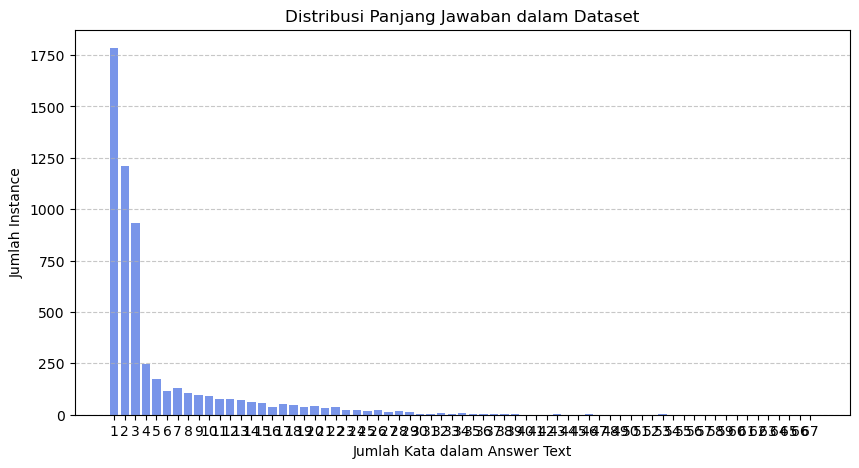

In [13]:
import matplotlib.pyplot as plt
from collections import Counter

# Hitung distribusi panjang jawaban
length_counts = Counter(len(row['answers']['text'][0].split()) for row in tydiqa_gold['train'] if row['answers']['text'])

# Urutkan berdasarkan panjang kata
sorted_lengths = sorted(length_counts.items())

# Ekstrak data untuk plotting
lengths, counts = zip(*sorted_lengths)

# Plot menggunakan Matplotlib
plt.figure(figsize=(10, 5))
plt.bar(lengths, counts, color='royalblue', alpha=0.7)
plt.xlabel("Jumlah Kata dalam Answer Text")
plt.ylabel("Jumlah Instance")
plt.title("Distribusi Panjang Jawaban dalam Dataset")
plt.xticks(range(min(lengths), max(lengths) + 1))  # Menampilkan semua jumlah kata pada sumbu x
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

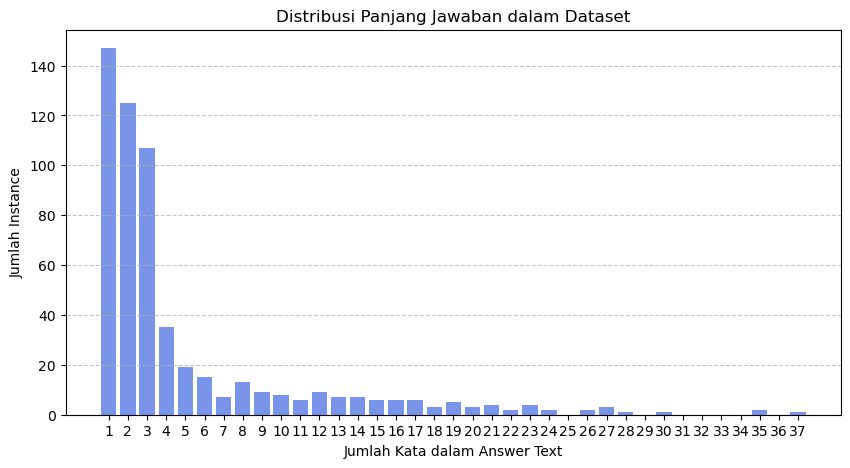

In [19]:
import matplotlib.pyplot as plt
from collections import Counter

# Hitung distribusi panjang jawaban
length_counts = Counter(len(row['answers']['text'][0].split()) for row in tydiqa_gold['validation'] if row['answers']['text'])

# Urutkan berdasarkan panjang kata
sorted_lengths = sorted(length_counts.items())

# Ekstrak data untuk plotting
lengths, counts = zip(*sorted_lengths)

# Plot menggunakan Matplotlib
plt.figure(figsize=(10, 5))
plt.bar(lengths, counts, color='royalblue', alpha=0.7)
plt.xlabel("Jumlah Kata dalam Answer Text")
plt.ylabel("Jumlah Instance")
plt.title("Distribusi Panjang Jawaban dalam Dataset")
plt.xticks(range(min(lengths), max(lengths) + 1))  # Menampilkan semua jumlah kata pada sumbu x
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [22]:
# Filter instance yang panjang jawabannya adalah 10 kata
instances_10_words = [row for row in tydiqa_gold['train'] if len(row['answers']['text'][0].split()) == 10]

# Tampilkan beberapa contoh
print(f"Jumlah instance dengan jawaban 10 kata: {len(instances_10_words)}\n")

for i, example in enumerate(instances_10_words[:5]):  # Ambil 5 contoh pertama
    print(f"Contoh {i+1}:")
    print(f"Pertanyaan: {example['question_text']}")
    print(f"Jawaban: {example['answers']['text'][0]}")
    print(f"Konteks: {example['passage_text'][:200]}...")  # Hanya tampilkan sebagian konteks untuk ringkas
    print("-" * 80)


Jumlah instance dengan jawaban 10 kata: 91

Contoh 1:
Pertanyaan: Apakah yang dimaksud dengan Generasi Z?
Jawaban: orang-orang yang lahir dalam rentang tahun kelahiran 1995 sampai 2014
Konteks: Generasi Z adalah generasi setelah Generasi Y, yang didefenisikan sebagai orang-orang yang lahir dalam rentang tahun kelahiran 1995 sampai 2014[1]....
--------------------------------------------------------------------------------
Contoh 2:
Pertanyaan: Apa itu poliester ?
Jawaban: kategori polimer yang mengandung gugus fungsional ester dalam rantai utamanya
Konteks: 

Poliester adalah suatu kategori polimer yang mengandung gugus fungsional ester dalam rantai utamanya. Meski terdapat banyak sekali poliester, istilah "poliester" merupakan sebagai sebuah bahan yang ...
--------------------------------------------------------------------------------
Contoh 3:
Pertanyaan: Apakah peristiwa terbesar yang pernah terjadi di Pompeii ?
Jawaban: gempa bumi yang hebat yang menimbulkan kerusakan yang cukup b

In [24]:
mr_tydi['train'][0]

{'query_id': '0',
 'query': 'dimanakah  Dr. Ernest François Eugène Douwes Dekker meninggal?',
 'positive_passages': [{'docid': '7080#33',
   'text': 'Ernest Douwes Dekker wafat dini hari tanggal 28 Agustus 1950 (tertulis di batu nisannya; 29 Agustus 1950 versi van der Veur, 2006) dan dimakamkan di TMP Cikutra, Bandung.',
   'title': 'Ernest Douwes Dekker'}],
 'negative_passages': [{'docid': '7074#0',
   'text': 'dr. Tjipto Mangoenkoesoemo (EYD: Cipto Mangunkusumo) (Pecangaan, Jepara, Jawa Tengah, 1886 – Jakarta, 8 Maret 1943) adalah seorang tokoh pergerakan kemerdekaan Indonesia. Bersama dengan Ernest Douwes Dekker dan Ki Hajar Dewantara ia dikenal sebagai "Tiga Serangkai" yang banyak menyebarluaskan ide pemerintahan sendiri dan kritis terhadap pemerintahan penjajahan Hindia Belanda. Ia adalah tokoh dalam Indische Partij, suatu organisasi politik yang pertama kali mencetuskan ide pemerintahan sendiri di tangan penduduk setempat, bukan oleh Belanda. Pada tahun 1913 ia dan kedua rekannya

In [23]:
mr_tydi['dev'][0]

{'query_id': '3',
 'query': 'Dimana James Hepburn meninggal?',
 'positive_passages': [{'docid': '2386357#15', 'text': '', 'title': ''}],
 'negative_passages': []}

# Generate data Mr Tydi

## Isi title dan text dari split dev dan test

In [5]:
from datasets import load_dataset

# Load dataset corpus (sumber teks dan title)
corpus = load_dataset("castorini/mr-tydi-corpus", "indonesian", trust_remote_code=True)

# Buat dictionary {docid: (title, text)} untuk pencarian cepat
corpus_dict = {row["docid"]: (row["title"], row["text"]) for row in corpus["train"]}

# Fungsi untuk melengkapi positive_passages dalam dataset mr_tydi
def fill_passage_info(example):
    for passage in example["positive_passages"]:
        docid = passage["docid"]
        if docid in corpus_dict:  # Cek apakah docid ada di corpus
            passage["title"], passage["text"] = corpus_dict[docid]
    
    return example

# Terapkan fungsi untuk melengkapi positive_passages di split 'dev' dan 'test'
mr_tydi["dev"] = mr_tydi["dev"].map(fill_passage_info)
mr_tydi["test"] = mr_tydi["test"].map(fill_passage_info)

# Cek hasilnya
mr_tydi["dev"][0]
# print(mr_tydi["test"][0])  # Contoh setelah pengisian

Map:   0%|          | 0/1224 [00:00<?, ? examples/s]

Map:   0%|          | 0/829 [00:00<?, ? examples/s]

{'query_id': '3',
 'query': 'Dimana James Hepburn meninggal?',
 'positive_passages': [{'docid': '2386357#15',
   'text': 'Dia dipenjarakan di Puri Dragsholm, 75 kilometer Kopenhagen. Dia ditahan dalam apa yang dikatakan sebagai kondisi yang mengerikan. Dia meninggal pada bulan April 1578.[8][10]',
   'title': 'James Hepburn'}],
 'negative_passages': [{'docid': '2386357#0',
   'text': 'James Hepburn (skt. 1534– 14 April 1578), Adipati Orkney pertama dan Earl Bothwell keempat (lebih dikenal sebagai Lord Bothwell), adalah seorang bangsawan terkemuka asal Skotlandia. Dia terkenal karena hubungannya dengan, penculikan, dan pernikahan dengan Maria, Ratu Skotlandia, sebagai suami ketiga dan terakhirnya. Dia dituduh membunuh suami kedua Maria, Henry Stuart, Lord Darnley, yang tuduhannya dibebaskan. Pernikahannya dengan Maria kontroversial dan membagi negara; ketika dia melarikan diri dari pemberontakan yang sedang tumbuh ke Skandinavia dia ditangkap di Norwegia dan menjalani sisa hidupnya dipe

## Ambil 2 passage untuk negative_passages khusus split dev dan test

#### Versi 3: Pakai FAISS

In [ ]:
import faiss
import numpy as np
import torch.nn.functional as F
import torch
from torch import Tensor
from tqdm import tqdm
import gc
import os
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModel

# Load tokenizer & model untuk Multilingual-E5-Base
model_name = "intfloat/multilingual-e5-base"
embedding_tokenizer = AutoTokenizer.from_pretrained(model_name)
embedding_model = AutoModel.from_pretrained(model_name).to("cuda:0")

# Fungsi average pooling
def average_pool(last_hidden_states: Tensor, attention_mask: Tensor) -> Tensor:
    last_hidden = last_hidden_states.masked_fill(~attention_mask[..., None].bool(), 0.0)
    return last_hidden.sum(dim=1) / attention_mask.sum(dim=1)[..., None]

from datasets import load_dataset

# Load dataset MR-TyDi dan Corpus
mr_tydi = load_dataset("castorini/mr-tydi", "indonesian", trust_remote_code=True)
corpus = load_dataset("castorini/mr-tydi-corpus", "indonesian", trust_remote_code=True)

In [2]:
corpus_dict = {row["docid"]: (row["title"], row["text"]) for row in corpus["train"]}
corpus_docids = list(corpus_dict.keys())
corpus_texts = [corpus_dict[docid][1] for docid in corpus_docids]  # Ambil teksnya saja

import faiss
# Load FAISS Index
index = faiss.read_index("generated_data/faiss_index.idx")

In [ ]:
import faiss
import numpy as np
import torch.nn.functional as F
import torch
from torch import Tensor
from tqdm import tqdm
import gc
import os
from datasets import load_dataset

# Load dataset MR-TyDi dan Corpus
mr_tydi = load_dataset("castorini/mr-tydi", "indonesian", trust_remote_code=True)
corpus = load_dataset("castorini/mr-tydi-corpus", "indonesian", trust_remote_code=True)

# Pastikan folder 'generated_data/' ada untuk menyimpan dataset berkala
os.makedirs("generated_data", exist_ok=True)

# Buat dictionary {docid: (title, text)} untuk lookup cepat dari corpus
corpus_dict = {row["docid"]: (row["title"], row["text"]) for row in corpus["train"]}

# Ambil semua dokumen text dari corpus untuk dijadikan embedding
corpus_docids = list(corpus_dict.keys())
corpus_texts = [corpus_dict[docid][1] for docid in corpus_docids]  # Ambil teksnya saja

# Tokenisasi dan embedding seluruh corpus (hanya dilakukan sekali untuk efisiensi)
batch_size = 128  # Sesuaikan dengan VRAM yang tersedia
corpus_embeddings = []

for start_idx in tqdm(range(0, len(corpus_texts), batch_size), desc="Encoding Corpus"):
    end_idx = min(start_idx + batch_size, len(corpus_texts))
    batch_texts = corpus_texts[start_idx:end_idx]

    batch_dict = embedding_tokenizer(batch_texts, max_length=512, padding=True, truncation=True, return_tensors='pt')
    batch_dict = {k: v.to("cuda:0") for k, v in batch_dict.items()}

    with torch.no_grad():
        outputs = embedding_model(**batch_dict)

    embeddings = average_pool(outputs.last_hidden_state, batch_dict['attention_mask'])
    embeddings = F.normalize(embeddings, p=2, dim=1)  # Normalisasi untuk cosine similarity
    corpus_embeddings.append(embeddings.to(torch.float32).cpu())  # Pastikan float32 dan tetap di CPU

# Gabungkan semua embedding menjadi satu tensor besar
corpus_embeddings = torch.cat(corpus_embeddings, dim=0).numpy().astype(np.float32)  # Konversi ke NumPy

# Buat FAISS index untuk pencarian similarity
index = faiss.IndexFlatIP(corpus_embeddings.shape[1])  # IP = Inner Product (Cosine Similarity)
index.add(corpus_embeddings)  # Tambahkan corpus embeddings ke FAISS


In [3]:
import gc
import torch
import torch.nn.functional as F

def add_negative_passages(batch, indices):
    batch_queries = batch["query"]  # List of queries

    batch_dict = embedding_tokenizer(batch_queries, max_length=512, padding=True, truncation=True, return_tensors='pt')
    batch_dict = {k: v.to("cuda:0") for k, v in batch_dict.items()}

    with torch.no_grad():
        outputs = embedding_model(**batch_dict)

    query_embeddings = average_pool(outputs.last_hidden_state, batch_dict['attention_mask'])
    query_embeddings = F.normalize(query_embeddings, p=2, dim=1).cpu().numpy().astype(np.float32)  # (batch, dim)

    # FAISS Search untuk semua query dalam batch
    D, I = index.search(query_embeddings, 10)  # Ambil 10 kandidat

    # Iterasi untuk setiap query dalam batch
    negative_passages_batch = []
    for i, idx in enumerate(indices):
        positive_docids = set(p["docid"] for p in batch["positive_passages"][i])
        selected_negative_passages = []

        for doc_idx in I[i]:  # Loop hasil FAISS untuk query ke-i
            docid = corpus_docids[doc_idx]
            if docid not in positive_docids:
                title, text = corpus_dict[docid]
                selected_negative_passages.append({"docid": docid, "title": title, "text": text})
            if len(selected_negative_passages) == 4:
                break

        negative_passages_batch.append(selected_negative_passages)

    batch["negative_passages"] = negative_passages_batch

    # 🔥 **BERSIHKAN CACHE GPU & MEMORI SETELAH BATCH SELESAI**
    del batch_dict, outputs, query_embeddings
    torch.cuda.empty_cache()  # Kosongkan cache GPU
    gc.collect()  # Kosongkan cache CPU untuk menghindari memory leak

    # 🔥 **SIMPAN CHECKPOINT SETIAP 1000 QUERY UNTUK KEAMANAN**
    if indices[0] % 500 == 0:  
        mr_tydi["dev"].to_json("generated_data/mr_tydi_dev_with_negatives.json", indent=2)
        mr_tydi["test"].to_json("generated_data/mr_tydi_test_with_negatives.json", indent=2)
        print(f"✅ Checkpoint disimpan setelah {indices[0]} query.")

    return batch

mr_tydi["dev"] = mr_tydi["dev"].map(add_negative_passages, with_indices=True, batched=True, batch_size=16)
mr_tydi["test"] = mr_tydi["test"].map(add_negative_passages, with_indices=True, batched=True, batch_size=16)

Map:   0%|          | 0/1224 [00:00<?, ? examples/s]

Creating json from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

✅ Checkpoint disimpan setelah 0 query.


Map:   0%|          | 0/829 [00:00<?, ? examples/s]

Creating json from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

✅ Checkpoint disimpan setelah 0 query.


#### Simpan checkpoint

In [2]:
import numpy as np
import faiss
import pickle

# Simpan corpus embeddings
np.save("generated_data/corpus_embeddings.npy", corpus_embeddings)

# Simpan FAISS Index
faiss.write_index(index, "generated_data/faiss_index.idx")

# Simpan dataset yang sudah diproses sebagian
mr_tydi["dev"].to_json("generated_data/mr_tydi_dev_checkpoint.json", indent=2)
mr_tydi["test"].to_json("generated_data/mr_tydi_test_checkpoint.json", indent=2)

print("Checkpoint berhasil disimpan!")

Creating json from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Checkpoint berhasil disimpan!


In [11]:
import json

# Buat dictionary untuk menyimpan ketiga split dataset
mr_tydi_dict = {
    "train": mr_tydi["train"].to_list(),
    "dev": mr_tydi["dev"].to_list(),  # Konversi ke list agar formatnya benar
    "test": mr_tydi["test"].to_list(),
}

# Simpan ke file JSON
with open("generated_data/mr_tydi_full.json", "w", encoding="utf-8") as f:
    json.dump(mr_tydi_dict, f, indent=2, ensure_ascii=False)

print("✅ Dataset berhasil disimpan dalam format JSON yang benar!")


✅ Dataset berhasil disimpan dalam format JSON yang benar!
